# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [1]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

Primeras filas:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4  

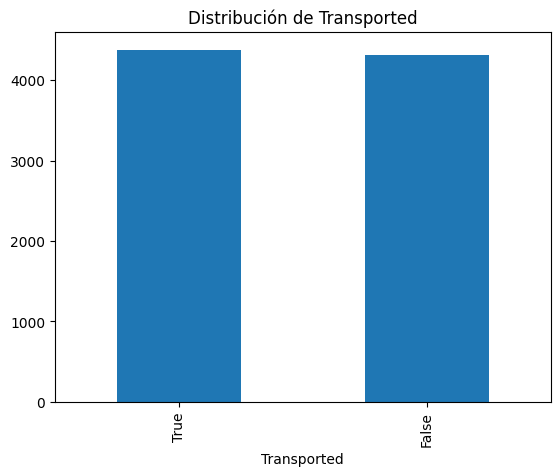

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv"
df = pd.read_csv(url)

print("Primeras filas:")
print(df.head())

print("\nDistribución del target (Transported):")
print(df['Transported'].value_counts())
print("\nProporciones:")
print(df['Transported'].value_counts(normalize=True))

df['Transported'].value_counts().plot(kind="bar")
plt.title("Distribución de Transported")
plt.show()


In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Transported', axis=1)
y = df['Transported']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño X_train:", X_train.shape)
print("Distribución y_train:\n", y_train.value_counts())


Tamaño X_train: (6954, 13)
Distribución y_train:
 Transported
True     3502
False    3452
Name: count, dtype: int64


In [5]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# 1) Detectar columnas numéricas y categóricas
numerical_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# 2) Pipeline para numéricas → imputar + escalar
num_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())   # 🔹 Feature Scaling
])

# 3) Pipeline para categóricas → imputar + One-Hot Encoding
cat_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # 🔹 One-Hot CORRECTO ✅
])

# 4) Combinar ambos en un preprocessor
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])

print("Columnas numéricas:", numerical_cols)
print("Columnas categóricas:", categorical_cols)


Columnas numéricas: ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
Columnas categóricas: ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [6]:
from sklearn.linear_model import LogisticRegression

pipeline_base = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

print("Pipeline creado ✅ listo para entrenar")


Pipeline creado ✅ listo para entrenar


In [7]:
pipeline_base.fit(X_train, y_train)
print("Modelo de regresión logística entrenado ✅")


Modelo de regresión logística entrenado ✅



--- 📌 Resultados del modelo base (Logistic Regression) ---
Accuracy: 0.7780
Precision: 0.7862
Recall: 0.7683
F1-score: 0.7771

Classification Report:

              precision    recall  f1-score   support

       False       0.77      0.79      0.78       863
        True       0.79      0.77      0.78       876

    accuracy                           0.78      1739
   macro avg       0.78      0.78      0.78      1739
weighted avg       0.78      0.78      0.78      1739



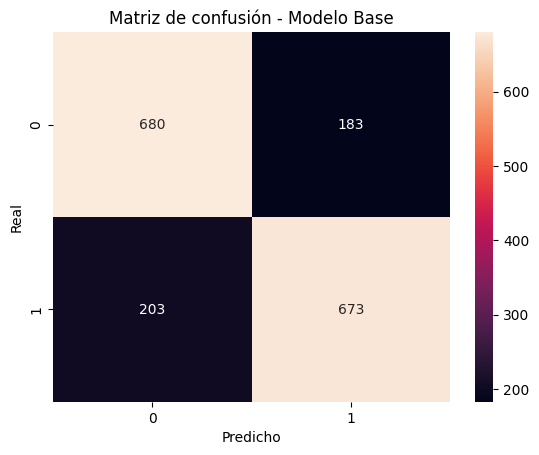

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predecimos en test
y_pred = pipeline_base.predict(X_test)

# Calculamos métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimimos resultados
print("\n--- 📌 Resultados del modelo base (Logistic Regression) ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Matriz de confusión - Modelo Base")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


# 🛸 Evaluación del Modelo Base — Regresión Logística en Spaceship Titanic

## 1. 🚀 Distribución de la variable objetivo

El dataset utilizado es el :contentReference[oaicite:2]{index=2}.  
Las clases están prácticamente equilibradas (≈50/50), por lo que **no se considera un dataset desbalanceado grave**. Esto significa que un modelo base puede entrenarse sin aplicar inicialmente técnicas como :contentReference[oaicite:3]{index=3} u :contentReference[oaicite:4]{index=4}.

---

## 2. 🧠 Modelo entrenado

Se entrenó un clasificador de tipo :contentReference[oaicite:5]{index=5} usando preprocesado con escalado (`StandardScaler`) y codificación de variables categóricas.

---

## 3. 📊 Resultados de evaluación (test set)

| Métrica | Valor |
|--------|--------|
| **Accuracy** | 0.7780 |
| **Precision (clase positiva = True)** | 0.7862 |
| **Recall (clase positiva = True)** | 0.7683 |
| **F1-score (clase positiva = True)** | 0.7771 |

---

## 4. 🧪 Classification Report

          precision    recall  f1-score   support

   False       0.77      0.79      0.78       863
    True       0.79      0.77      0.78       876

accuracy                           0.78      1739



**Observaciones clave:**
- El rendimiento por clase es **muy similar**, lo que confirma que no existe desbalanceo crítico.
- La **precisión** en la clase positiva es ligeramente superior a 0.78, indicando pocas predicciones erróneas positivas.
- El **recall** de 0.7683 muestra que el modelo detecta correctamente el 76.8% de los casos Transported = True.
- El **F1-score** equilibrado (~0.78) indica buen balance entre precisión y recall.

---

## 5. ✅ Conclusión

El modelo base de :contentReference[oaicite:6]{index=6} tiene un rendimiento **estable y equilibrado en ambas clases**, con métricas coherentes (~0.78).  
Dado que el dataset **ya está balanceado**, técnicas avanzadas como :contentReference[oaicite:7]{index=7} del paquete imbalanced-learn **podrían no suponer una mejora significativa**, y en algunos casos pueden introducir ruido sintético innecesario.

El siguiente paso lógico del lab será realizar **ajuste de hiperparámetros con Grid Search** para intentar mejorar ligeramente la regresión logística o comparar con otros clasificadores (como RandomForest).
